/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in log10


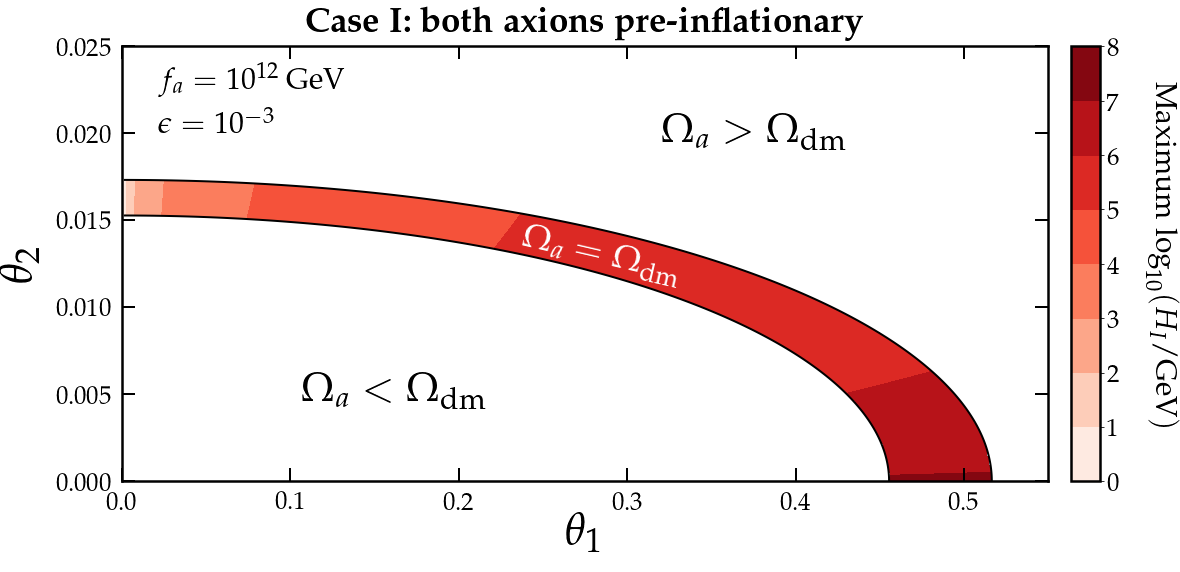

In [43]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from AxionFuncs import *
from matplotlib import colors as c
import cmasher as cmr

def Omega_a12(f,eps,k,theta_1,theta_2):
    Mpl_GeV = 2.4e18
    Mpl_MeV = Mpl_GeV*1e3
    T0 = 2.35e-4/1e6 # MeV
    g0 = 3.91
    g1 = 61.75
    ni = 6.68
    Tt = 103.0 # MeV

    dm_sq,m1,m2,tan_2alpha = Parameters(f,eps)

    T1 = ((m1/1e6)*Mpl_MeV*sqrt(90)/(3*pi*sqrt(61.75)))**(2/(ni+4))*Tt**(ni/(ni+4))

    rho_c = 8.06e-11 # eV^4

    m1_T1 = m1*(Tt/T1)**(ni/2) # eV

    rho1 = m1_T1*m1*theta_1**2*(f*1e9)**2*(T0/T1)**3*(g0/g1) # eV
    
    Omega1 = rho1/rho_c
    Omega2 = Omega1*(theta_2/theta_1)**2*k**((n+2)/(2*(n+4)))*eps**(-(n+6)/(n+4))
    return Omega1,Omega2

def LimTheta(f,eps,k,Omega_dm):
    Mpl_GeV = 2.4e18
    Mpl_MeV = Mpl_GeV*1e3
    T0 = 2.35e-4/1e6 # MeV
    g0 = 3.91
    g1 = 61.75
    ni = 6.68
    Tt = 103.0 # MeV

    dm_sq,m1,m2,tan_2alpha = Parameters(f,eps)

    T1 = ((m1/1e6)*Mpl_MeV*sqrt(90)/(3*pi*sqrt(61.75)))**(2/(ni+4))*Tt**(ni/(ni+4))

    rho_c = 8.06e-11 # eV^4

    m1_T1 = m1*(Tt/T1)**(ni/2) # eV

    F = (m1_T1*m1*(f*1e9)**2*(T0/T1)**3*(g0/g1))
    
    theta_1_max = sqrt(Omega_dm*rho_c/F)
    theta_2_max = sqrt(Omega_dm*rho_c/(F*k**((n+2)/(2*(n+4)))*eps**(-(n+6)/(n+4))))
    return theta_1_max,theta_2_max

n = 100

k = 0.6
f = 1e12
eps = 1e-3
theta_1 = linspace(0,0.55,500)
theta_2 = linspace(0,0.025,500)
TH1,TH2 = meshgrid(theta_1,theta_2)
Omega1,Omega2 = Omega_a12(array([f]),array([eps]),k,TH1,TH2)

theta_1_max,theta_2_max = LimTheta(array([f]),array([eps]),k,0.12+0.015)
theta_1_min,theta_2_min = LimTheta(array([f]),array([eps]),k,0.12-0.015)


fig,ax = MySquarePlot(r'$\theta_1$',r'$\theta_2$',size_x=20,size_y=8)
Omega = Omega1+Omega2

beta = 0.038
A_s = 2e-9
H_I = sqrt(beta*A_s)*pi*f*TH1/(1+eps**-2*TH2**2/TH1**2)**0.5

H_I[Omega>0.12+0.015] = nan
H_I[Omega<0.12-0.015] = nan

#ax.axvline(theta_1_max,linestyle='--',color='k')
#ax.axhline(theta_2_max,linestyle='--',color='k')

plt.gcf().text(0.25,0.25,r'$\Omega_a < \Omega_{\rm dm}$',fontsize=40)
plt.gcf().text(0.5,0.7,r'$\Omega_a > \Omega_{\rm dm}$',fontsize=40)
plt.gcf().text(0.40,0.46,r'$\Omega_a = \Omega_{\rm dm}$',fontsize=35,color='w',rotation=-13)

plt.gcf().text(0.15,0.8,'$f_a = 10^{12}$ GeV',fontsize=30)
plt.gcf().text(0.15,0.73,'$\epsilon = 10^{-3}$',fontsize=30)

plt.contour(theta_1,theta_2,Omega,colors='k',linewidths=2,linestyles='-',levels=[0.12-0.015])
#plt.contour(theta_1,theta_2,Omega,colors='w',linewidths=2,linestyles='-',levels=[0.12-0.015])
plt.contour(theta_1,theta_2,Omega,colors='k',linewidths=2,linestyles='-',levels=[0.12+0.015])
#plt.contour(theta_1,theta_2,Omega,colors='w',linewidths=2,linestyles='-',levels=[0.12+0.015])
im = plt.contourf(theta_1,theta_2,log10(H_I),cmap=cm.Reds,levels=arange(0,9,1))
plt.colorbar(im,pad=0.02,aspect=15)
plt.gcf().text(0.832,0.23,r'Maximum $\log_{10}(H_I/{\rm GeV})$',rotation=-90,fontsize=30,color='w')
plt.gcf().text(0.83,0.23,r'Maximum $\log_{10}(H_I/{\rm GeV})$',rotation=-90,fontsize=30)
plt.title(r'{\bf Case I: both axions pre-inflationary}',fontsize=35,pad=15)
MySaveFig(fig,'ThetaAngles')


In [252]:
def Omega_a12(f,eps,k,theta_1,theta_2):
    Mpl_GeV = 2.4e18
    Mpl_MeV = Mpl_GeV*1e3
    T0 = 2.35e-4/1e6 # MeV
    g0 = 3.91
    g1 = 61.75
    ni = 6.68
    Tt = 103.0 # MeV

    dm_sq,m1,m2,tan_2alpha = Parameters(f,eps)

    T1 = ((m1/1e6)*Mpl_MeV*sqrt(90)/(3*pi*sqrt(61.75)))**(2/(ni+4))*Tt**(ni/(ni+4))

    rho_c = 8.06e-11 # eV^4

    m1_T1 = m1*(Tt/T1)**(ni/2) # eV

    rho1 = m1_T1*m1*theta_1**2*(f*1e9)**2*(T0/T1)**3*(g0/g1) # eV
    
    Omega1 = rho1/rho_c
    Omega2 = Omega1*(theta_2/theta_1)**2*k**((n+2)/(2*(n+4)))*eps**(-(n+6)/(n+4))
    return Omega1,Omega2

def LimTheta(f,eps,k,Omega_dm):
    Mpl_GeV = 2.4e18
    Mpl_MeV = Mpl_GeV*1e3
    T0 = 2.35e-4/1e6 # MeV
    g0 = 3.91
    g1 = 61.75
    ni = 6.68
    Tt = 103.0 # MeV

    dm_sq,m1,m2,tan_2alpha = Parameters(f,eps)

    T1 = ((m1/1e6)*Mpl_MeV*sqrt(90)/(3*pi*sqrt(61.75)))**(2/(ni+4))*Tt**(ni/(ni+4))

    rho_c = 8.06e-11 # eV^4

    m1_T1 = m1*(Tt/T1)**(ni/2) # eV

    F = (m1_T1*m1*(f*1e9)**2*(T0/T1)**3*(g0/g1))
    
    theta_1_max = sqrt(Omega_dm*rho_c/F)
    theta_2_max = sqrt(Omega_dm*rho_c/(F*k**((n+2)/(2*(n+4)))*eps**(-(n+6)/(n+4))))
    return theta_1_max,theta_2_max

def Omega_CaseIII(f,eps,k):
    Mpl_GeV = 2.4e18
    Mpl_MeV = Mpl_GeV*1e3
    T0 = 2.35e-4/1e6 # MeV
    g0 = 3.91
    g1 = 61.75
    ni = 6.68
    Tt = 103.0 # MeV
    
    theta_1 = pi/sqrt(3)
    theta_2 = pi/sqrt(3)

    dm_sq,m1,m2,tan_2alpha = Parameters(f,eps)

    T1 = ((m1/1e6)*Mpl_MeV*sqrt(90)/(3*pi*sqrt(61.75)))**(2/(ni+4))*Tt**(ni/(ni+4))

    rho_c = 8.06e-11 # eV^4

    m1_T1 = m1*(Tt/T1)**(ni/2) # eV

    rho1 = m1_T1*m1*theta_1**2*(f*1e9)**2*(T0/T1)**3*(g0/g1) # eV
    
    Omega1 = rho1/rho_c
    Omega2 = Omega1*(theta_2/theta_1)**2*k**((n+2)/(2*(n+4)))*eps**(-(n+6)/(n+4))
    
    return Omega1,Omega2


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


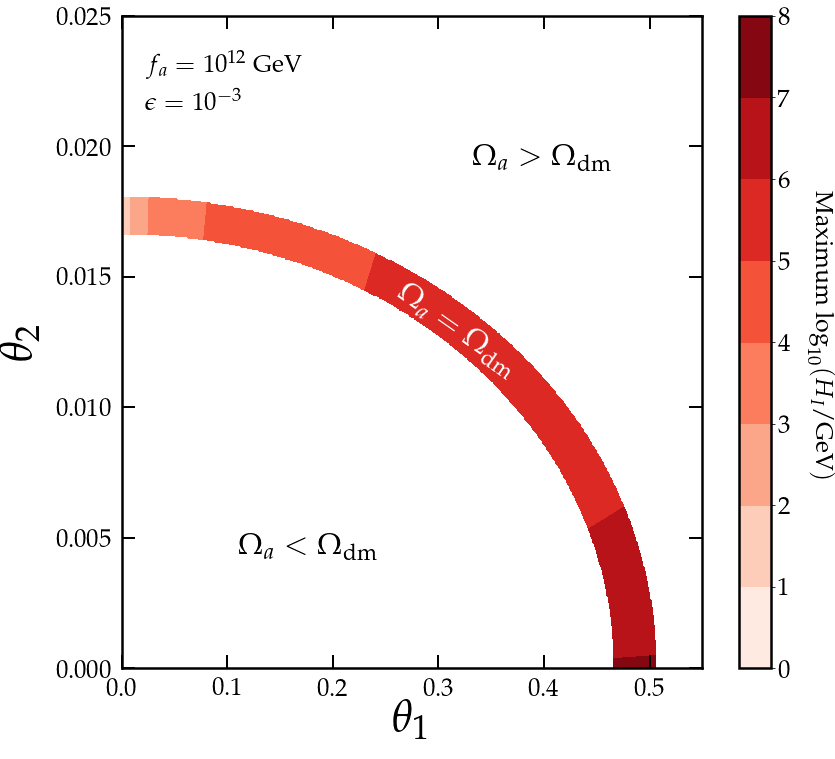

In [251]:
k = 0.6
f = 1e12
eps = 1e-3
theta_1 = linspace(0,0.55,500)
theta_2 = linspace(0,0.025,500)
TH1,TH2 = meshgrid(theta_1,theta_2)
Omega1,Omega2 = Omega_a12(array([f]),array([eps]),k,TH1,TH2)

theta_1_max,theta_2_max = LimTheta(array([f]),array([eps]),k,0.12+0.01)
theta_1_min,theta_2_min = LimTheta(array([f]),array([eps]),k,0.12-0.01)


fig,ax = MySquarePlot(r'$\theta_1$',r'$\theta_2$')
Omega = Omega1+Omega2

beta = 0.038
A_s = 2e-9
H_I = sqrt(beta*A_s)*pi*f*TH1/(1+eps**-2*TH2**2/TH1**2)**0.5

H_I[Omega>0.12+0.01] = nan
H_I[Omega<0.12-0.01] = nan

#ax.axvline(theta_1_max,linestyle='--',color='k')
#ax.axhline(theta_2_max,linestyle='--',color='k')

plt.gcf().text(0.25,0.25,r'$\Omega_a < \Omega_{\rm dm}$',fontsize=30)
plt.gcf().text(0.5,0.7,r'$\Omega_a > \Omega_{\rm dm}$',fontsize=30)
plt.gcf().text(0.41,0.46,r'$\Omega_a = \Omega_{\rm dm}$',fontsize=30,color='w',rotation=-35)

plt.gcf().text(0.15,0.81,'$f_a = 10^{12}$ GeV')
plt.gcf().text(0.15,0.77,'$\epsilon = 10^{-3}$')

plt.contourf(theta_1,theta_2,log10(H_I),cmap=cm.Reds,levels=arange(0,9,1))
plt.colorbar()
plt.gcf().text(0.85,0.35,r'Maximum $\log_{10}(H_I/{\rm GeV})$',rotation=-90)

MySaveFig(fig,'ThetaAngles')

In [247]:
n = 1000
fvals = logspace(7,19,n)
epsvals = logspace(-10,0,n)
f,eps = meshgrid(fvals,epsvals)

theta_1_max,theta_2_max = LimTheta(f,eps,k,0.12)
theta_1_max[theta_1_max>pi-0.1] = nan
theta_1_max[theta_1_max<0.1] = nan

theta_2_max[theta_2_max>pi-0.01] = nan
theta_2_max[theta_2_max<0.01] = nan

H_I = sqrt(beta*A_s)*pi*f*theta_1_max

theta_comb = theta_1_max+theta_2_max
theta_comb = ~isnan(theta_comb)

theta_2_max = ~isnan(theta_2_max)
theta_1_max = ~isnan(theta_1_max)
H_I[~theta_comb] = nan


Omega1,Omega2 = Omega_a12(f,eps,k,1.0,1.0)
Omega_ratio = Omega2/(Omega1+Omega2)
Omega_ratio[~theta_comb] = nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


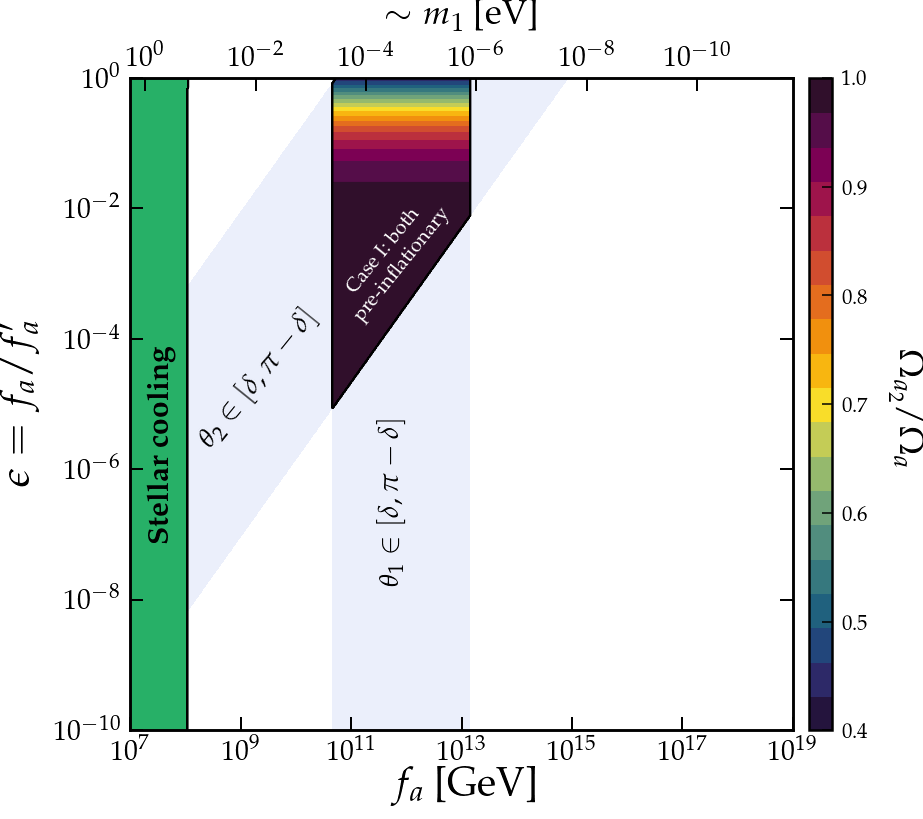

In [249]:
fig,ax1 = Plot_PQscales_OnePanel(fvals,epsvals,size_x=14.3,tfs=28,lfs=40)
StellarCooling(ax1,fvals,epsvals,text_pos=[2e7,1e-7])


im1 = plt.contourf(fvals,epsvals,Omega_ratio,zorder=10,cmap=cmr.pride,levels=linspace(0.4,1,20))
# Colorbar
cb = fig.colorbar(im1,ax=ax1,pad=0.02,aspect=28)
cb.solids.set_edgecolor("face")
cb.set_ticks(arange(0.4,1+0.1,0.1))
cb.ax.tick_params(which='major',length=10,width=1.5,direction='in',labelsize=21,pad=10)
for c in im1.collections: c.set_edgecolor("face")
plt.gcf().text(0.871,0.44,r'$\Omega_{a_2}/\Omega_a$',color='w',rotation=-90,fontsize=35,ha='center')
plt.gcf().text(0.87,0.44,r'$\Omega_{a_2}/\Omega_a$',rotation=-90,fontsize=35,ha='center')

plt.contour(fvals,epsvals,theta_comb,linestyles='-',zorder=10,colors='k')


PlotContour(ax1,fvals,epsvals,theta_1_max,zorder=-100,alpha=0.1,facecolor='royalblue',edge_on=False)
PlotContour(ax1,fvals,epsvals,theta_2_max,zorder=-100,alpha=0.1,facecolor='royalblue',edge_on=False)


plt.gcf().text(0.37,0.3,r'$\theta_1 \in [\delta,\pi-\delta]$',rotation=90)
plt.gcf().text(0.19,0.45,r'$\theta_2 \in [\delta,\pi-\delta]$',rotation=51)


#plt.colorbar(im1)
#eps_pre = (1e11/1e7*(pi/theta_2))**-1
#ax1.axhline(eps_pre,color='k',zorder=-1)

plt.gcf().text(0.38,0.6,'Case I: both \n pre-inflationary',ha='center',color='w',fontsize=20,rotation=51)

# Upper axis
ax2 = ax1.twiny()
ax2.set_xscale('log')
plt.gcf().text(0.5,0.93,'--',color='w',zorder=-1000)
ax2.set_xlabel('$\sim m_1$ [eV]',fontsize=35,labelpad=15)
ax2.set_xlim([m1[0,0],m1[0,-1]])
ax2.tick_params(direction='in',width=2,length=13)

MySaveFig(fig,'CompAxion_Preinflation')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in less


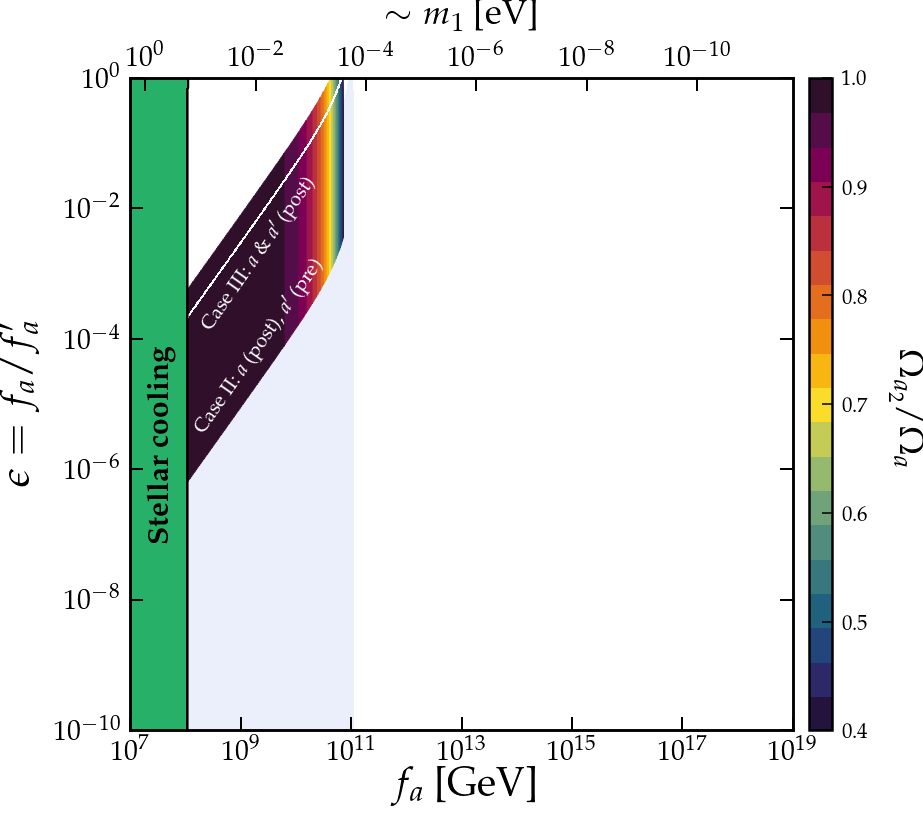

In [291]:
def Omega_CaseIII(f,eps,k):
    Mpl_GeV = 2.4e18
    Mpl_MeV = Mpl_GeV*1e3
    T0 = 2.35e-4/1e6 # MeV
    g0 = 3.91
    g1 = 61.75
    ni = 6.68
    Tt = 103.0 # MeV
    
    theta_1 = pi/sqrt(3)
    theta_2 = pi/sqrt(3)

    dm_sq,m1,m2,tan_2alpha = Parameters(f,eps)

    T1 = ((m1/1e6)*Mpl_MeV*sqrt(90)/(3*pi*sqrt(61.75)))**(2/(ni+4))*Tt**(ni/(ni+4))

    rho_c = 8.06e-11 # eV^4

    m1_T1 = m1*(Tt/T1)**(ni/2) # eV

    rho1 = m1_T1*m1*theta_1**2*(f*1e9)**2*(T0/T1)**3*(g0/g1) # eV
    
    Omega1 = rho1/rho_c
    Omega2 = Omega1*(theta_2/theta_1)**2*k**((n+2)/(2*(n+4)))*eps**(-(n+6)/(n+4))
    
    return Omega1,Omega2


def Theta2_CaseII(f,eps,k,Omega_dm=0.12):
    Mpl_GeV = 2.4e18
    Mpl_MeV = Mpl_GeV*1e3
    T0 = 2.35e-4/1e6 # MeV
    g0 = 3.91
    g1 = 61.75
    ni = 6.68
    Tt = 103.0 # MeV
    
    theta_1 = pi/sqrt(3)

    dm_sq,m1,m2,tan_2alpha = Parameters(f,eps)

    T1 = ((m1/1e6)*Mpl_MeV*sqrt(90)/(3*pi*sqrt(61.75)))**(2/(ni+4))*Tt**(ni/(ni+4))

    rho_c = 8.06e-11 # eV^4

    m1_T1 = m1*(Tt/T1)**(ni/2) # eV

    rho1 = m1_T1*m1*theta_1**2*(f*1e9)**2*(T0/T1)**3*(g0/g1) # eV
    
    ke = k**((n+2)/(2*(n+4)))*eps**(-(n+6)/(n+4))
    
    Omega1 = rho1/rho_c
    theta_2 = theta_1*sqrt((Omega_dm/Omega1 - 1)/ke)
    Omega2 = Omega_dm-Omega1
    return theta_2,Omega1,Omega2

n = 1000
fvals = logspace(7,19,n)
epsvals = logspace(-10,0,n)
f,eps = meshgrid(fvals,epsvals)

fig,ax1 = Plot_PQscales_OnePanel(fvals,epsvals,size_x=14.3,tfs=28,lfs=40)
StellarCooling(ax1,fvals,epsvals,text_pos=[2e7,1e-7])


# Case II
theta_2,Omega1,Omega2 = Theta2_CaseII(f,eps,k)
Omega_ratio = Omega2/(Omega1+Omega2)
Omega_ratio[theta_2>pi-0.1] = nan
Omega_ratio[theta_2<0.1] = nan
PlotContour(ax1,fvals,epsvals,theta_2,zorder=-100,alpha=0.1,facecolor='royalblue',edge_on=False)

im1 = plt.contourf(fvals,epsvals,Omega_ratio,zorder=-10,cmap=cmr.pride,levels=linspace(0.4,1,20))

# Case III
Omega1,Omega2 = Omega_CaseIII(f,eps,k)
Omega_tot = Omega1+Omega2
Omega_ratio = Omega2/(Omega1+Omega2)
Omega_ratio[Omega_tot<0.115] = nan
Omega_ratio[Omega_tot>0.125] = nan
plt.contourf(fvals,epsvals,Omega_ratio,zorder=-10,colors='w',levels=1)

# Colorbar
cb = fig.colorbar(im1,ax=ax1,pad=0.02,aspect=28)
cb.solids.set_edgecolor("face")
cb.set_ticks(arange(0.4,1+0.1,0.1))
cb.ax.tick_params(which='major',length=10,width=1.5,direction='in',labelsize=21,pad=10)
for c in im1.collections: c.set_edgecolor("face")
plt.gcf().text(0.871,0.44,r'$\Omega_{a_2}/\Omega_a$',color='w',rotation=-90,fontsize=35,ha='center')
plt.gcf().text(0.87,0.44,r'$\Omega_{a_2}/\Omega_a$',rotation=-90,fontsize=35,ha='center')


plt.gcf().text(0.25,0.47,'Case II: $a$ (post), $a^\prime$ (pre)',ha='center',color='w',fontsize=20,rotation=55)

plt.gcf().text(0.25,0.59,'Case III: $a$ \& $a^\prime$ (post)',ha='center',color='w',fontsize=20,rotation=55)




# Upper axis
ax2 = ax1.twiny()
ax2.set_xscale('log')
plt.gcf().text(0.5,0.93,'--',color='w',zorder=-1000)
ax2.set_xlabel('$\sim m_1$ [eV]',fontsize=35,labelpad=15)
ax2.set_xlim([m1[0,0],m1[0,-1]])
ax2.tick_params(direction='in',width=2,length=13)

MySaveFig(fig,'CompAxion_Postinflation')

/Users/ciaranohare/Work/CompAxion/AxionFuncs.py:56: RuntimeWarning: invalid value encountered in sqrt
  m2 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)-(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in sqrt


array([[5.02385232e-03, 4.94203733e-03, 4.86155469e-03, ...,
                   nan,            nan,            nan],
       [5.08220103e-03, 4.99943581e-03, 4.91801841e-03, ...,
                   nan,            nan,            nan],
       [5.14122742e-03, 5.05750094e-03, 4.97513793e-03, ...,
                   nan,            nan,            nan],
       ...,
       [4.99442696e+02, 4.91309116e+02, 4.83307989e+02, ...,
                   nan,            nan,            nan],
       [5.05109138e+02, 4.96883278e+02, 4.88791375e+02, ...,
                   nan,            nan,            nan],
       [5.10833648e+02, 5.02514563e+02, 4.94330952e+02, ...,
                   nan,            nan,            nan]])

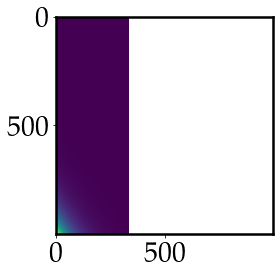

In [293]:
theta_2,Omega1,Omega2 = Theta2_CaseII(f,eps,k)
plt.imshow(theta_2)
theta_2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


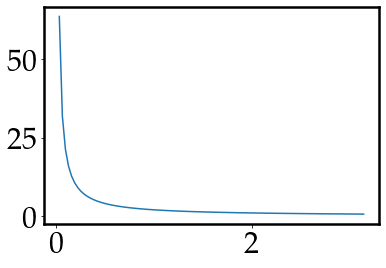

In [74]:
theta_i = linspace(0.0,pi,101)

H_I = 1e6
fa = 1e12

fth = log(e/(1-theta_i**2/pi**2))**(7/6)

sigma_th = H_I/(2*pi*fa)

thetasq_var = (theta_i**2 + sigma_th**2)*fth

dth = theta_i[1]-theta_i[0]
dtheta = gradient(thetasq_var,dth)
plt.plot(theta_i[1:],dtheta[1:]/thetasq_var[1:])

plt.plot(theta_i)

#plt.ylim([0,1])

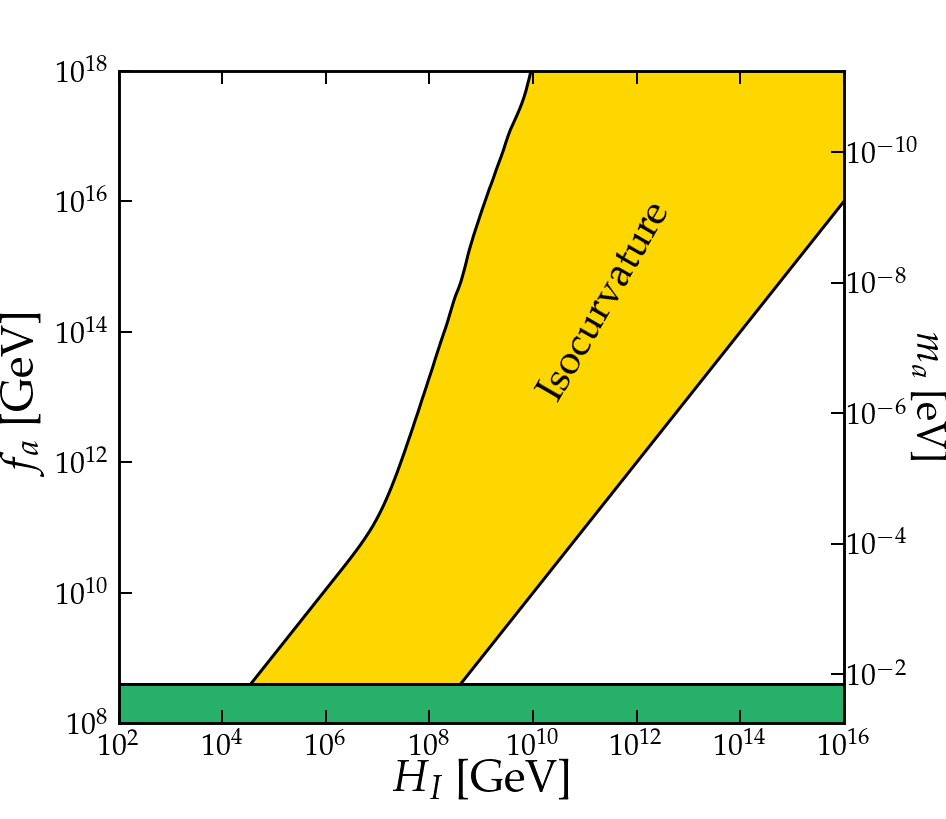

In [59]:
fig,ax1 = MySquarePlot(r'$H_I$ [GeV]',r'$f_a$ [GeV]',tfs=30)


ax1.fill_between([1e2,1e16],[1/2.5e-9,1/2.5e-9],y2=1e0,edgecolor='k',lw=3,color=HB_col)
ax1.plot([1e2,1e16],[1/2.5e-9,1/2.5e-9],color='k',lw=3)



fmin = 1e8
fmax = 1e18
mmin = (sqrt(2*K_QCD)/fmin)*1e9
mmax = (sqrt(2*K_QCD)/fmax)*1e9

plt.plot(fa,fa,lw=3,color='k',zorder=0)

plt.plot(H_I_lim,fa,lw=3,color='k',zorder=0)


plt.fill(concatenate((H_I_lim,flipud(fa))),concatenate((fa,flipud(fa))),color='gold',zorder=-100)

plt.xlim([1e2,1e16])
plt.ylim([fmin,1e18])
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.text(1e10,1e13,'Isocurvature',rotation=60,fontsize=40)


# Upper axis
ax2 = ax1.twinx()
ax2.set_yscale('log')
plt.gcf().text(0.5,0.93,'--',color='w')
ax2.set_ylabel('$m_a$ [eV]',fontsize=40,labelpad=20,rotation=-90)
ax2.set_ylim([mmin,mmax])
ax2.tick_params(direction='in',width=2,length=13)
